In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plty
import plotly.graph_objs as go 
from plotly import tools
from plotly.offline import init_notebook_mode, iplot, plot 

from datetime import timedelta
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import re

In [2]:
missing_values=['None',' None']
df_train=pd.read_csv("train_multichannel_marketing_datasets.csv",na_values=missing_values,encoding='ISO-8859-1')
#df_train=pd.read_csv("mca.csv",na_values=missing_values,encoding='ISO-8859-1')

c:\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (12,16,17,20) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
df_test=pd.read_csv("test_multichannel_marketing_datasets.csv",na_values=missing_values,encoding='ISO-8859-1')
#df_test=pd.read_csv("preprocessed_test_df.csv",na_values=missing_values,encoding='ISO-8859-1')

c:\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



### Data description

In [4]:
df_train.head(10)

visitNumber       visitId  visitStartTime        date  visits  hit  \
0          1.0  1.470041e+09    1.470041e+09  20160801.0     1.0  1.0   
1          1.0  1.470046e+09    1.470046e+09  20160801.0     1.0  1.0   
2          1.0  1.470113e+09    1.470113e+09  20160801.0     1.0  1.0   
3          1.0  1.470163e+09    1.470163e+09  20160802.0     1.0  1.0   
4          1.0  1.470286e+09    1.470286e+09  20160803.0     1.0  1.0   
5          1.0  1.470227e+09    1.470227e+09  20160803.0     1.0  1.0   
6          1.0  1.470286e+09    1.470286e+09  20160803.0     1.0  1.0   
7          1.0  1.470337e+09    1.470337e+09  20160804.0     1.0  1.0   
8          1.0  1.470455e+09    1.470455e+09  20160805.0     1.0  1.0   
9          1.0  1.470399e+09    1.470399e+09  20160805.0     1.0  1.0   

   Pageviews  timeOnSite  transactions  transactionRevenue  ...  Continent  \
0        1.0         NaN           NaN                 NaN  ...       Asia   
1        1.0         NaN           NaN                 NaN  ...       Asia   
2        1.0         NaN           NaN                 NaN  ...       Asia   
3        1.0         NaN           NaN                 NaN  ...       Asia   
4        1.0         NaN           NaN                 NaN  ...       Asia   
5        1.0         NaN           NaN                 NaN  ...       Asia   
6        1.0         NaN           NaN                 NaN  ...       Asia   
7        1.0         NaN           NaN                 NaN  ...       Asia   
8        1.0         NaN           NaN                 NaN  ...       Asia   
9        1.0         NaN           NaN                 NaN  ...       Asia   

    subContinent country                         region  \
0  Southern Asia   India  not available in demo dataset   
1  Southern Asia   India  not available in demo dataset   
2  Southern Asia   India  not available in demo dataset   
3  Southern Asia   India  not available in demo dataset   
4  Southern Asia   India  not available in demo dataset   
5  Southern Asia   India  not available in demo dataset   
6  Southern Asia   India  not available in demo dataset   
7  Southern Asia   India  not available in demo dataset   
8  Southern Asia   India  not available in demo dataset   
9  Southern Asia   India  not available in demo dataset   

                           metro                           city  \
0  not available in demo dataset  not available in demo dataset   
1  not available in demo dataset  not available in demo dataset   
2  not available in demo dataset  not available in demo dataset   
3  not available in demo dataset  not available in demo dataset   
4  not available in demo dataset  not available in demo dataset   
5  not available in demo dataset  not available in demo dataset   
6  not available in demo dataset  not available in demo dataset   
7  not available in demo dataset  not available in demo dataset   
8  not available in demo dataset  not available in demo dataset   
9  not available in demo dataset  not available in demo dataset   

     networkDomain fullVisitorId channelGrouping  socialEngagementType  
0  unknown.unknown  2.490000e+18          Social  Not Socially Engaged  
1  unknown.unknown  9.290000e+17          Social  Not Socially Engaged  
2  unknown.unknown  1.620000e+18          Social  Not Socially Engaged  
3  unknown.unknown  7.210000e+18          Social  Not Socially Engaged  
4  unknown.unknown  5.090000e+18          Social  Not Socially Engaged  
5  unknown.unknown  6.860000e+18          Social  Not Socially Engaged  
6  unknown.unknown  3.880000e+18          Social  Not Socially Engaged  
7  unknown.unknown  6.010000e+18          Social  Not Socially Engaged  
8  unknown.unknown  9.880000e+17          Social  Not Socially Engaged  
9  unknown.unknown  2.260000e+18          Social  Not Socially Engaged  

[10 rows x 32 columns]

In [5]:
print("In train dataset \nNumber of rows {} \ncolumns {}".format(df_train.shape[0],df_train.shape[1]))
print('\n')
print("In test dataset \nNumber of rows {} \ncolumns {}".format(df_test.shape[0],df_test.shape[1]))

In train dataset 
Number of rows 898309 
columns 32


In test dataset 
Number of rows 401589 
columns 30


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898309 entries, 0 to 898308
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   visitNumber              897945 non-null  float64
 1   visitId                  897945 non-null  float64
 2   visitStartTime           897945 non-null  float64
 3   date                     897945 non-null  float64
 4   visits                   897945 non-null  float64
 5   hit                      897945 non-null  float64
 6   Pageviews                897846 non-null  float64
 7   timeOnSite               449377 non-null  float64
 8   transactions             11473 non-null   float64
 9   transactionRevenue       11437 non-null   float64
 10  totalTransactionRevenue  11437 non-null   float64
 11  sessionQualityDim        65823 non-null   float64
 12  referralPath             329011 non-null  object 
 13  campaign                 897927 non-null  object 
 14  sour

In [7]:
df_train.describe()

visitNumber       visitId  visitStartTime          date    visits  \
count  897945.000000  8.979450e+05    8.979450e+05  8.979450e+05  897945.0   
mean        2.265203  1.484951e+09    1.484951e+09  2.016588e+07       1.0   
std         9.282112  8.953206e+06    8.953206e+06  4.695008e+03       0.0   
min         1.000000  1.470035e+09    1.470035e+09  2.016080e+07       1.0   
25%         1.000000  1.477579e+09    1.477579e+09  2.016103e+07       1.0   
50%         1.000000  1.483922e+09    1.483922e+09  2.017011e+07       1.0   
75%         1.000000  1.492617e+09    1.492617e+09  2.017042e+07       1.0   
max       395.000000  1.501571e+09    1.501571e+09  2.017073e+07       1.0   

                 hit      Pageviews     timeOnSite  transactions  \
count  897945.000000  897846.000000  449377.000000  11473.000000   
mean        4.599606       3.852745     262.509877      1.048636   
std         9.634463       7.024473     485.064098      0.456327   
min         1.000000       1.000000       1.000000      1.000000   
25%         1.000000       1.000000      32.000000      1.000000   
50%         2.000000       1.000000      84.000000      1.000000   
75%         4.000000       4.000000     259.000000      1.000000   
max       500.000000     469.000000   19017.000000     25.000000   

       transactionRevenue  totalTransactionRevenue  sessionQualityDim  \
count        1.143700e+04             1.143700e+04       65823.000000   
mean         1.337325e+08             1.546296e+08           4.255731   
std          4.490213e+08             7.224420e+08          13.040675   
min          1.000000e+04             1.200000e+06           1.000000   
25%          2.487000e+07             2.998000e+07           1.000000   
50%          4.946000e+07             5.554000e+07           1.000000   
75%          1.074000e+08             1.164800e+08           1.000000   
max          2.312950e+10             4.708206e+10          99.000000   

       fullVisitorId  
count   8.979440e+05  
mean    4.506056e+18  
std     3.071202e+18  
min     4.823600e+12  
25%     1.590000e+18  
50%     4.390000e+18  
75%     7.200000e+18  
max     5.200000e+19

### MIssing value analysis

####  Train dataset

In [8]:
df_train.isnull().sum()

visitNumber                   364
visitId                       364
visitStartTime                364
date                          364
visits                        364
hit                           364
Pageviews                     463
timeOnSite                 448932
transactions               886836
transactionRevenue         886872
totalTransactionRevenue    886872
sessionQualityDim          832486
referralPath               569298
campaign                      382
source                        364
medium                        364
keyword                    658564
adContent                  887240
browser                       364
operatingSystem               364
isMobile                      364
deviceCategory                364
Continent                     364
subContinent                  364
country                       364
region                        364
metro                         364
city                          364
networkDomain                 364
fullVisitorId 

In [9]:
# Percentage of missing values.
percent_missing=df_train.isnull().sum() * 100 / len(df_train.index)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})

missing_value_df

column_name  percent_missing
visitNumber                          visitNumber         0.040521
visitId                                  visitId         0.040521
visitStartTime                    visitStartTime         0.040521
date                                        date         0.040521
visits                                    visits         0.040521
hit                                          hit         0.040521
Pageviews                              Pageviews         0.051541
timeOnSite                            timeOnSite        49.975231
transactions                        transactions        98.722823
transactionRevenue            transactionRevenue        98.726830
totalTransactionRevenue  totalTransactionRevenue        98.726830
sessionQualityDim              sessionQualityDim        92.672566
referralPath                        referralPath        63.374407
campaign                                campaign         0.042524
source                                    source         0.040521
medium                                    medium         0.040521
keyword                                  keyword        73.311522
adContent                              adContent        98.767796
browser                                  browser         0.040521
operatingSystem                  operatingSystem         0.040521
isMobile                                isMobile         0.040521
deviceCategory                    deviceCategory         0.040521
Continent                              Continent         0.040521
subContinent                        subContinent         0.040521
country                                  country         0.040521
region                                    region         0.040521
metro                                      metro         0.040521
city                                        city         0.040521
networkDomain                      networkDomain         0.040521
fullVisitorId                      fullVisitorId         0.040632
channelGrouping                  channelGrouping         7.994354
socialEngagementType        socialEngagementType         0.000223

<AxesSubplot:xlabel='column_name'>

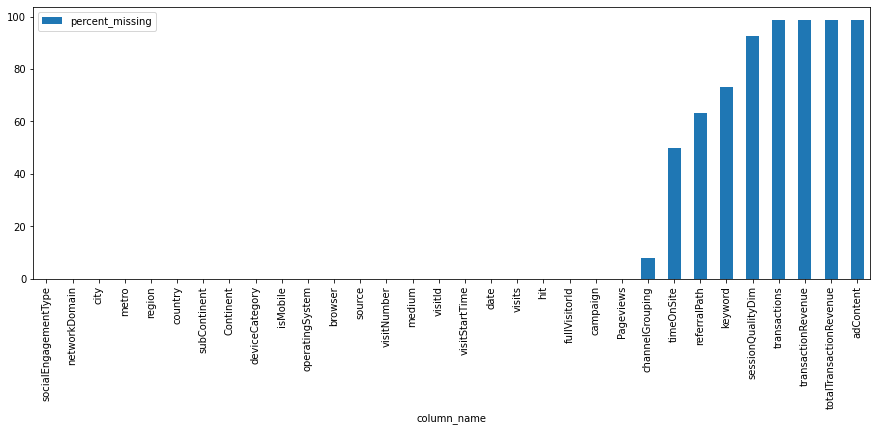

In [10]:
missing_value_df.sort_values("percent_missing").plot(kind='bar',x='column_name',y='percent_missing',figsize=(15, 5))

There are almost 98% null values in totaltransactionrev and ad content so we remove them or fill some other value as required in future

***Rename the features**

In [11]:
df_train = df_train.rename(columns={"sessionQualityDim":"totals.sessionQualityDim","timeOnSite":"totals.timeOnSite","transactions":"totals.transactions",
                                   "transactionRevenue":"totals.transactionRevenue",'hit':'totals.hits','Pageviews':'totals.pageviews',"keyword":"trafficSource.keyword",
                                   "referralPath":"trafficSource.referralPath","adContent":"trafficSource.adContent","campaign":"trafficSource.campaign","source":"trafficSource.source",
                                    "medium":"trafficSource.medium",'browser':'device.browser','operatingSystem':'device.operatingSystem',
                                   'isMobile':'device.isMobile','deviceCategory':'device.deviceCategory',
                                   'Continent':'geoNetwork.continent','subContinent':'geoNetwork.subContinent','country':'geoNetwork.country',
                                   'region':'geoNetwork.region','metro':'geoNetwork.metro','city':'geoNetwork.city','networkDomain':'geoNetwork.networkDomain'})

In [12]:
df_train.columns

Index(['visitNumber', 'visitId', 'visitStartTime', 'date', 'visits',
       'totals.hits', 'totals.pageviews', 'totals.timeOnSite',
       'totals.transactions', 'totals.transactionRevenue',
       'totalTransactionRevenue', 'totals.sessionQualityDim',
       'trafficSource.referralPath', 'trafficSource.campaign',
       'trafficSource.source', 'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.adContent', 'device.browser', 'device.operatingSystem',
       'device.isMobile', 'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.networkDomain',
       'fullVisitorId', 'channelGrouping', 'socialEngagementType'],
      dtype='object')

## Exploratory Data Analysis

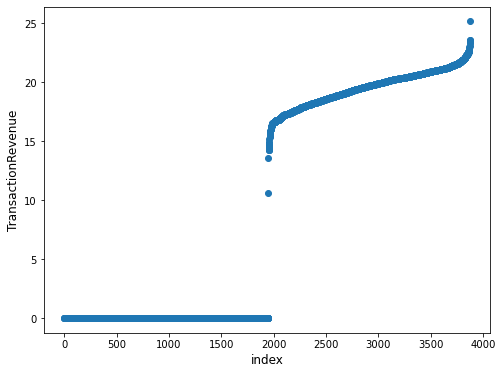

In [13]:
df_train["totals.transactionRevenue"] = df_train["totals.transactionRevenue"].astype('float') # converting to 'float' datatype
temp = df_train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index() # for each user we are taking sum of  
                                                                                       # all his transactions

plt.figure(figsize=(8,6))
plt.scatter(range(temp.shape[0]),np.sort(np.log1p(temp["totals.transactionRevenue"].values))) # log(transaction_revenue)
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

- RESAMPLED DATA GIVES AN O/P OF AROUND 50-50 OF NON TRANSCATION AND TRANSACTION DATA

In [14]:
non_zero_Revenue_records = 0
unique_users_with_non_zero_revenue = set()
 
for i,j in zip(df_train['totals.transactionRevenue'],df_train['fullVisitorId']):
    if i>0:
        non_zero_Revenue_records += 1
        unique_users_with_non_zero_revenue.add(j)

print("total no.of transactions with non-zero revenue out of: {0} are: {1} and \
which is about :{2} %".format(df_train.shape[0],non_zero_Revenue_records,(non_zero_Revenue_records*100)/(df_train.shape[0])))

print("\n")

print("out of {0} customers only {1} customers are generating revenue and which is about: {2}%" \
      .format(df_train['fullVisitorId'].nunique(),len(unique_users_with_non_zero_revenue),(len(unique_users_with_non_zero_revenue))*100/df_train['fullVisitorId'].nunique()))

total no.of transactions with non-zero revenue out of: 898309 are: 11437 and which is about :1.2731699225990165 %


out of 3877 customers only 1928 customers are generating revenue and which is about: 49.729172040237295%


In [15]:
print("common users between train and test are: ",len(set(df_train.fullVisitorId).intersection(set(df_test.fullVisitorId))))

common users between train and test are:  0


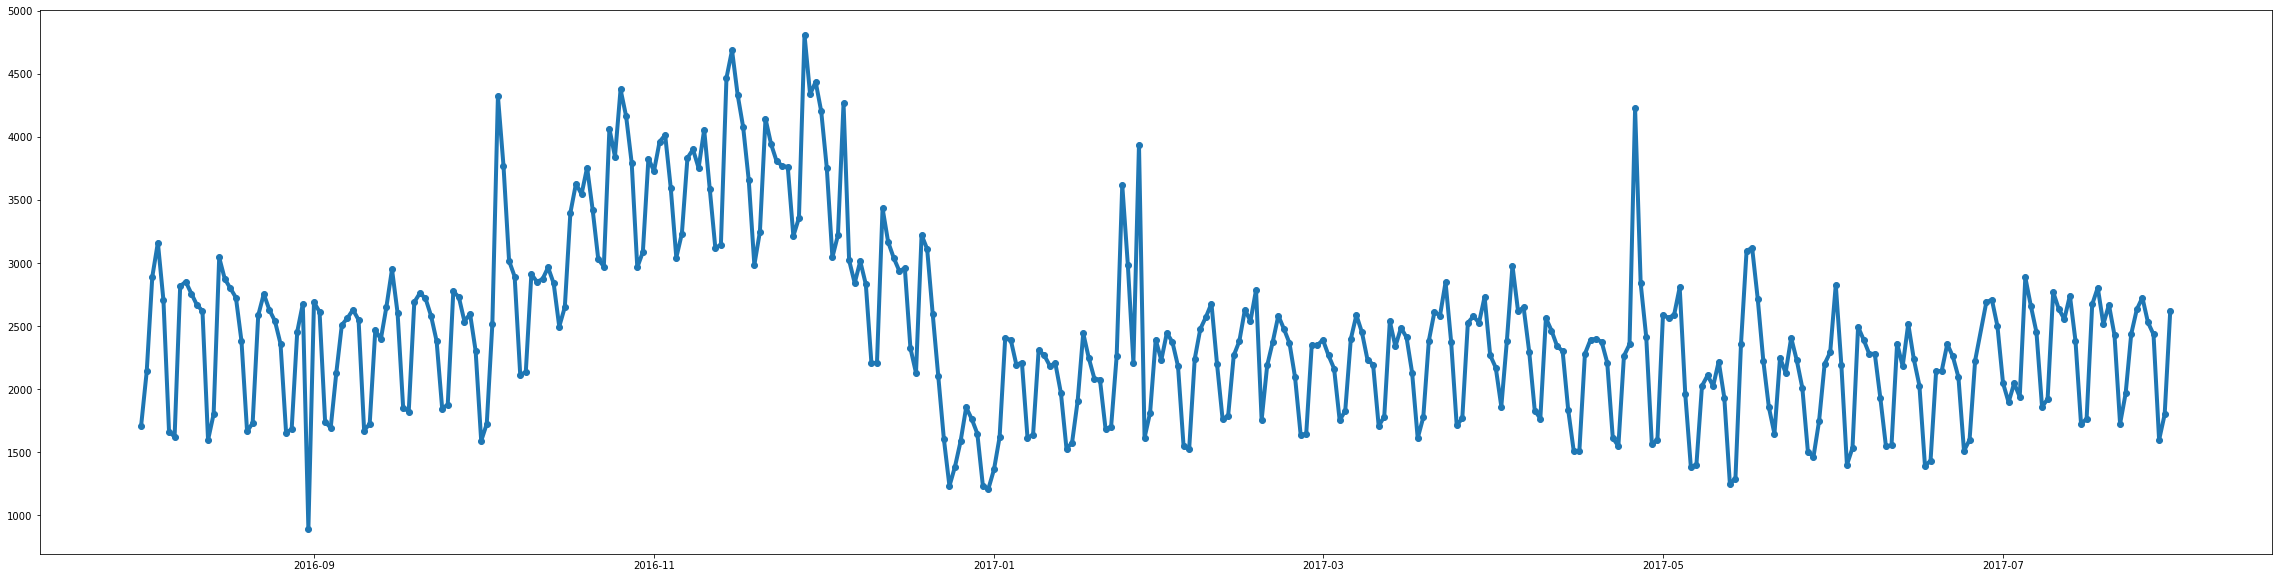

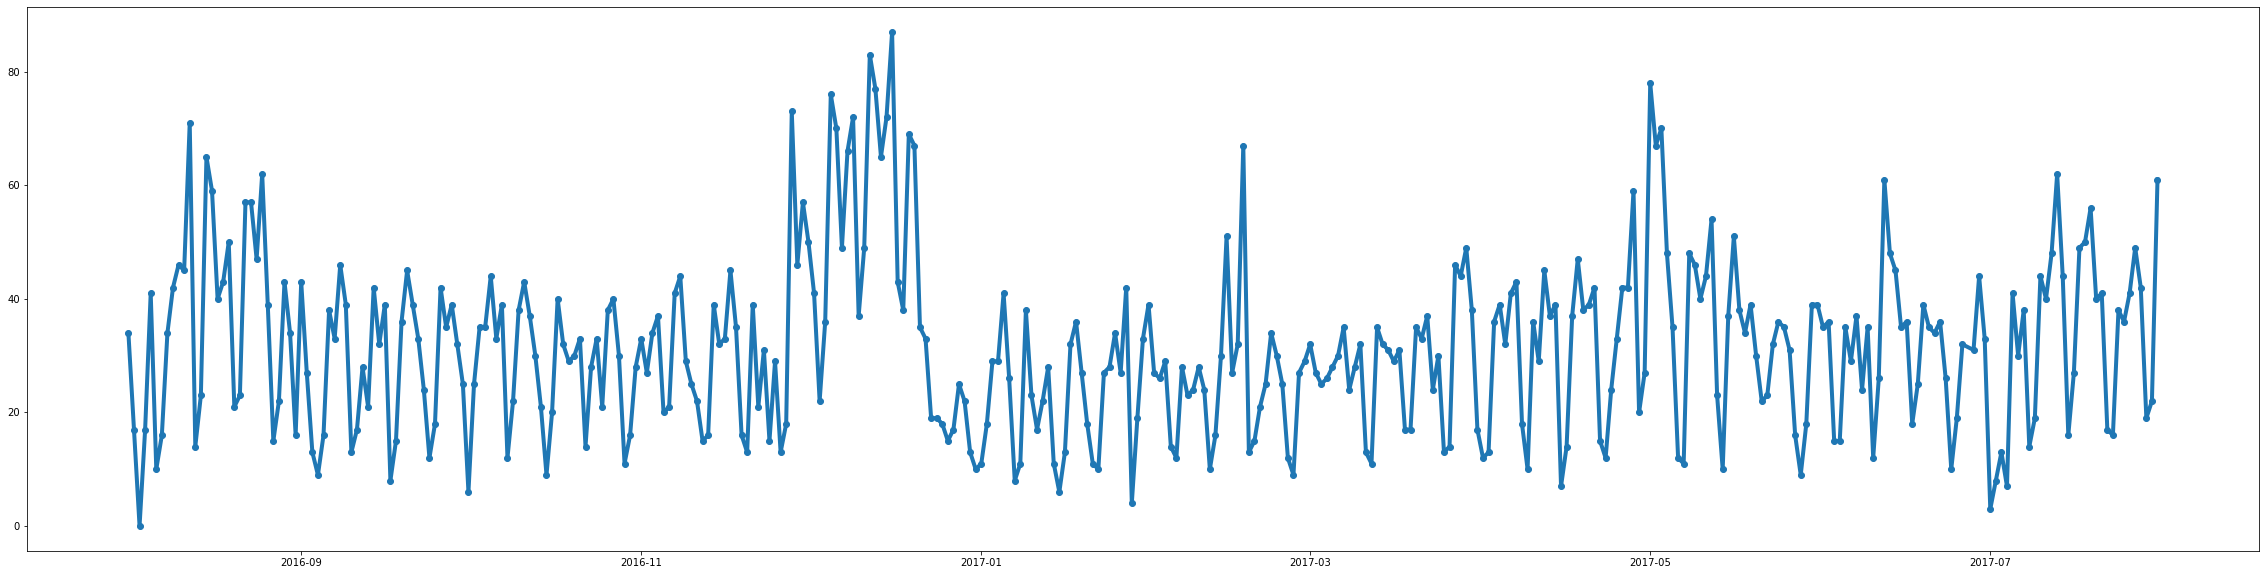

In [16]:
df_train["date"] = pd.to_datetime(df_train["date"], infer_datetime_format=True, format="%Y%m%d") # convert date feature into 
                                                                                                 # exact date format
    

# Compute count of group, excluding missing values(include only non zero values).
counts_group_date = df_train.groupby('date').count()
counts_group_date.reset_index(inplace=True) #it will create indexes from zero to len(dataframe)


# plot for no.of visits in each date :

plt.figure(figsize=(40,10))
plt.plot_date(x = counts_group_date['date'], y = counts_group_date['fullVisitorId'],linestyle='solid',linewidth=4)
#plt.xlabel('Date',fontsize=25)
#plt.ylabel('Visits',fontsize=50)
# plt.rc('xtick', labelsize=40) #increases the value's font on x-axis
# plt.rc('ytick', labelsize=40) #increases the value's font on y-axis
plt.autoscale(True)
plt.show()

# plot for transcation revenue in each date :

plt.figure(figsize=(40,10))
plt.plot_date(x = counts_group_date['date'], y = counts_group_date['totals.transactionRevenue'],linestyle='solid',linewidth=4)
#plt.xlabel('Date',fontsize=25)
#plt.ylabel('# non zero transactions',fontsize=50)
# plt.rc('xtick', labelsize=40) #increases the value's font on x-axis
# plt.rc('ytick', labelsize=40) #increases the value's font on x-axis
plt.autoscale(True)
plt.show()

- THESE PEAKS TELL THE ANALYTICS TEAM ABOUT HOW TRANSACTION AND VISITS ARE DIRECTLY PROPRTIONAL TO EACH OTHER.
- HIGHER THE VISITS IN MONTH MORE THE NON ZERO TRANSCATION

[]

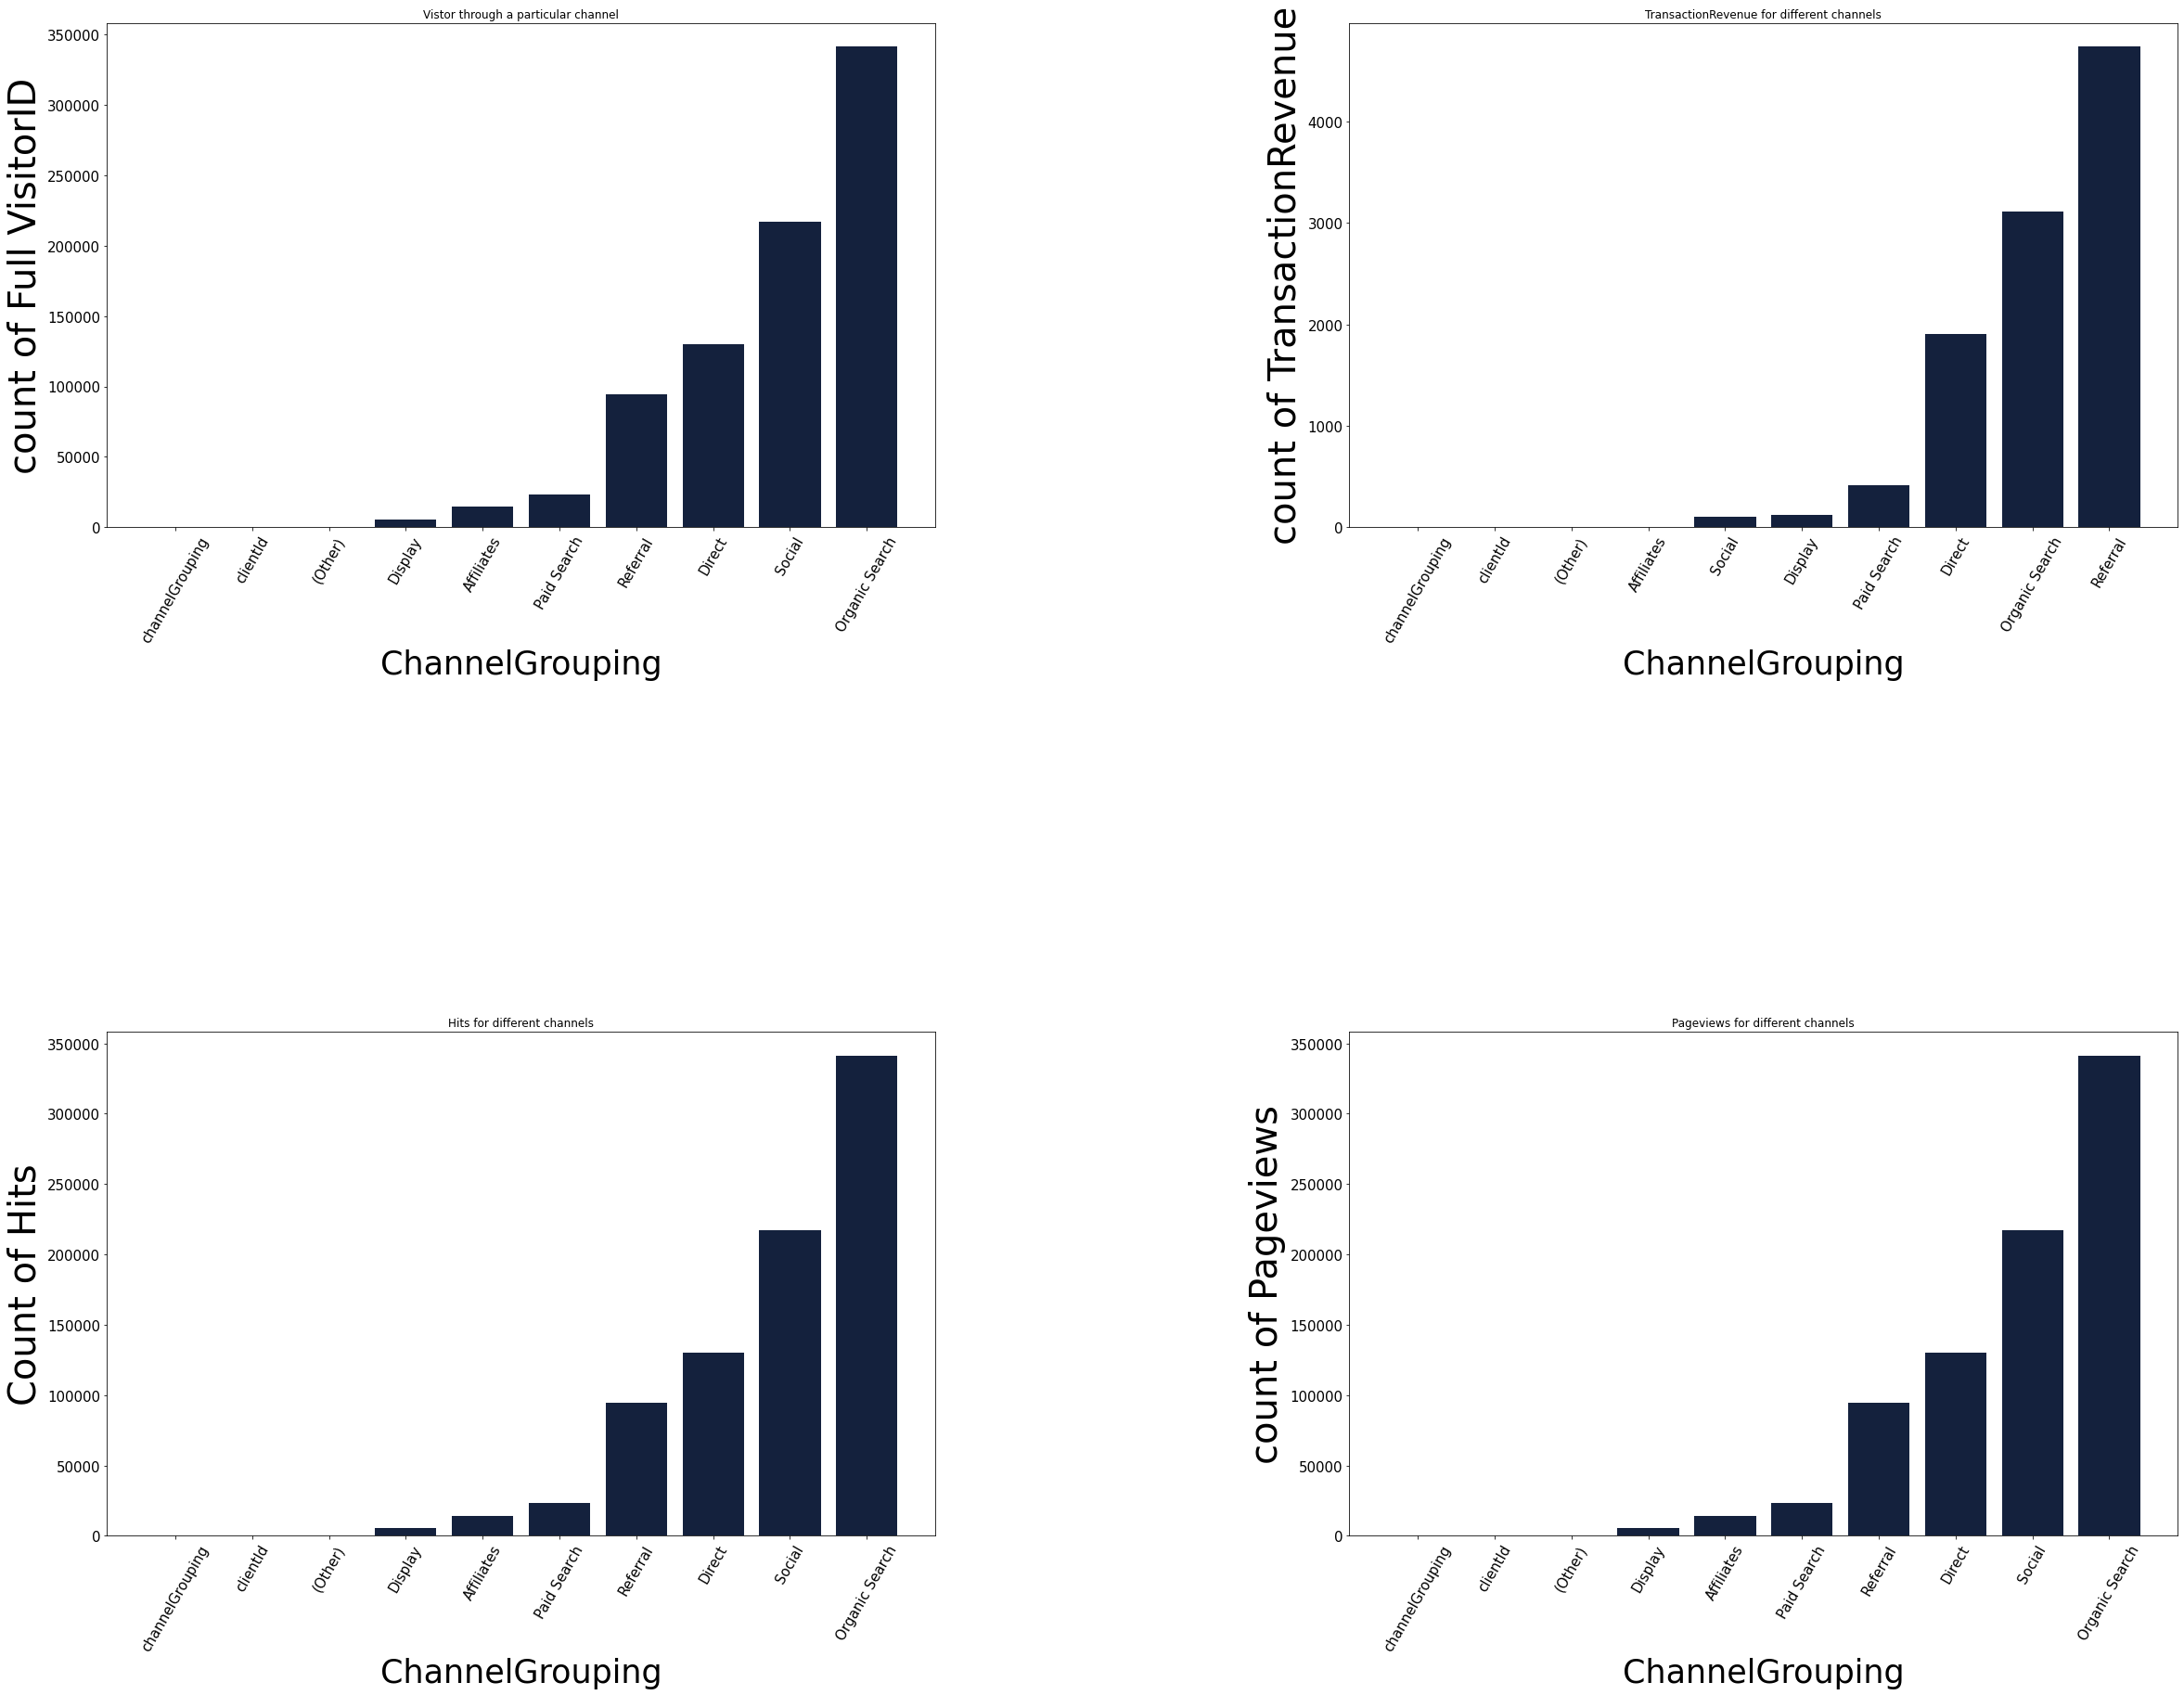

In [38]:
plt.figure(figsize=(40,30))
plt.subplots_adjust(wspace=0.5,hspace=1)
plt.subplot(2,2,1)
cfv=df_train.groupby('channelGrouping')['fullVisitorId'].agg('count').to_frame()
cfv.columns=['count_fullVisitorId']
plt.title('Vistor through a particular channel')
cfv_sorted=cfv.sort_values(by='count_fullVisitorId',ascending=True)
plt.bar(cfv_sorted.index,'count_fullVisitorId',data=cfv_sorted)
plt.ylabel('count of Full VisitorID',fontsize=40)
plt.xlabel('ChannelGrouping',fontsize=35)
plt.xticks(rotation=60)
plt.plot()

#new plot

plt.subplot(2,2,2)
plt.title('TransactionRevenue for different channels')
ctr=df_train.groupby('channelGrouping')['totals.transactionRevenue'].agg('count').to_frame()
ctr.columns=['count_TransactionRevenue']
ctr_sorted=ctr.sort_values(by='count_TransactionRevenue',ascending=True)
plt.bar(ctr_sorted.index,'count_TransactionRevenue',data=ctr_sorted)
plt.ylabel('count of TransactionRevenue',fontsize=40)
plt.xlabel('ChannelGrouping',fontsize=35)
plt.xticks(rotation=60)
plt.plot()

#newplot


plt.subplot(2,2,3)
plt.title('Hits for different channels')
ch=df_train.groupby('channelGrouping')['totals.hits'].agg('count').to_frame()
ch.columns=['count_hits']
ch_sorted=ch.sort_values(by='count_hits',ascending=True)
plt.bar(ch_sorted.index,'count_hits',data=ch_sorted)
plt.ylabel('Count of Hits',fontsize=40)
plt.xlabel('ChannelGrouping',fontsize=35)
plt.xticks(rotation=60)
plt.plot()

#new plot

plt.subplot(2,2,4)
plt.title('Pageviews for different channels')
ch=df_train.groupby('channelGrouping')['totals.pageviews'].agg('count').to_frame()
ch.columns=['count_pageviews']
ch_sorted=ch.sort_values(by='count_pageviews',ascending=True)
plt.bar(ch_sorted.index,'count_pageviews',data=ch_sorted)
plt.ylabel('count of Pageviews',fontsize=40)
plt.xlabel('ChannelGrouping',fontsize=35)
plt.xticks(rotation=60)
plt.plot()

***Observations:***
- Inabove graph results of pageviews, hits and fullvisitorid are same so we can conclude that there is direct relationship 
between them
- Also there is highest revenue is generated from referral,organic or direct but number of visits are less in direct so analytics team can invest in these channel

Text(0, 0.5, 'Transaction Revenue in Millions')

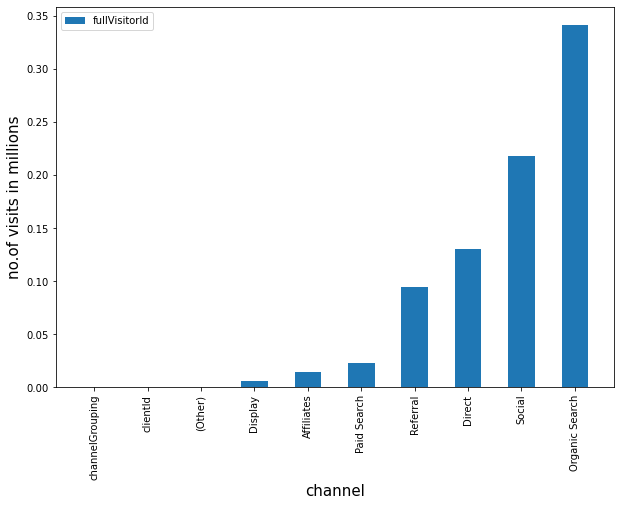

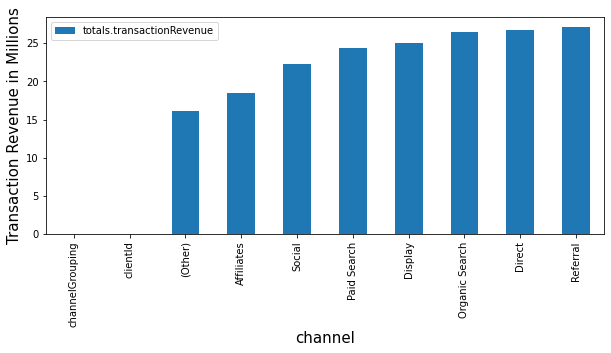

In [18]:
temp_1 = df_train.groupby('channelGrouping')['fullVisitorId'].count().reset_index() # counting no.of transactions in each group.

temp_2 = df_train.groupby("channelGrouping")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
                                                                                            # sum of all transactions


# for no.of visits in each channel plot: 
# --------------------------------

temp_1['fullVisitorId'] = (temp_1['fullVisitorId'])/(10**6)
temp_1.sort_values("fullVisitorId").plot(kind='bar',x='channelGrouping',y='fullVisitorId',figsize=(10,7))
plt.autoscale(True)
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
# plt.rc('xtick', labelsize=26) # x- axis value's font size
# plt.rc('ytick', labelsize=25) # y- axis value's font size

plt.xlabel('channel', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in millions', fontsize=15) # y- axis label and font size


# for revenue in each channel plot: 
# --------------------------------

temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)

temp_2.sort_values("totals.transactionRevenue").plot(kind='bar',x='channelGrouping',y='totals.transactionRevenue',figsize=(10,4))
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
# plt.rc('xtick', labelsize=26) # x- axis value's font size
# plt.rc('ytick', labelsize=25) # y- axis value's font size

plt.xlabel('channel', fontsize=15)                         # x- axis label and font size
plt.ylabel('Transaction Revenue in Millions', fontsize=15) 

ABOVE GRAPH SHOWS THAT :

- EVEN THOUGH VISITS ARE LESS IN CHANNEL LIKE DISPLAY AND AFFLICATED THEY CONTRIBUTE ALOT ON TOTAL TRANSACTION , HENCE HERE MORE MONEY CAN BE INVESTED .
- SECONDLY REFRRAL AND ORGANIC SEARCH HAVE AHIGH VISIT NUMBER , REDUCING AD COST ON THESE CHANNEL WOUL STILL MAINTAIN TRANSACTION REVENUE GENRATED BY THEM

***web-browser analysis:¶***
- no.of visits per each browser
- total revenue generated per each browser
- It's very difficult to analyse all the browsers that we had in train data( since it had some of the browsers that we had never known)., so we will analyze only top 20 browsers.(here top means depends on their occurence in train data)

Text(0, 0.5, 'Transaction Revenue in Millions')

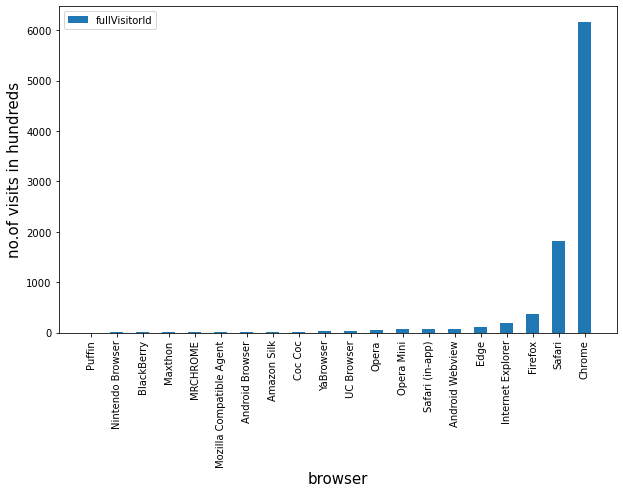

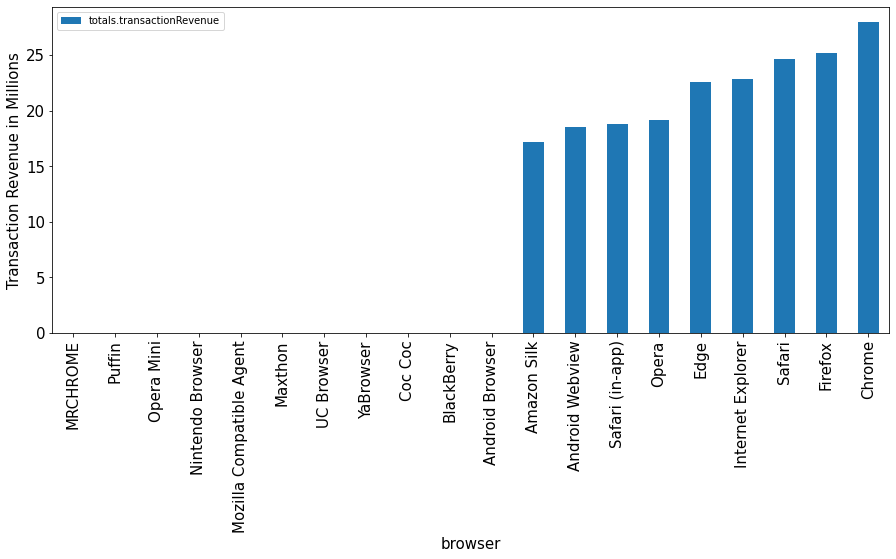

In [19]:
temp_1 = df_train.groupby('device.browser')['fullVisitorId'].count().reset_index() # counting no.of transactions in each group.

temp_2 = df_train.groupby("device.browser")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
                                                                                            # sum of all transactions

top_20_browsers = df_train['device.browser'].value_counts()[:20].index.tolist() # list the top 20 browsers
temp_1 = temp_1[temp_1['device.browser'].isin(top_20_browsers)].reset_index()                 # taking only top-20 brosers group
temp_2 = temp_2[temp_2['device.browser'].isin(top_20_browsers)].reset_index()                 #  taking only top-20 brosers group 

# for no.of visits in each operatingSystem plot: 
# ---------------------------------------------

temp_1['fullVisitorId'] = (temp_1['fullVisitorId'])/10**2
temp_1.sort_values("fullVisitorId").plot(kind='bar',x='device.browser',y='fullVisitorId',figsize=(10,6))
plt.autoscale(True)
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('browser', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in hundreds', fontsize=15) # y- axis label and font size


# for revenue in each operatingSystem plot: 
# ---------------------------------------

temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)

temp_2.sort_values("totals.transactionRevenue").plot(kind='bar',x='device.browser',y='totals.transactionRevenue',figsize=(15,6))
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('browser', fontsize=15)                         # x- axis label and font size
plt.ylabel('Transaction Revenue in Millions', fontsize=15)

- CHROME CONTRIBUTES MAX TO THE REVENUE 
- EVEN IF VISITS ARE LESS IN OPERA , ANDROID WEBVIEWER , INTERNET EXPLORER  THEY CONTRIBUTE ALOT IN REVENUE **THESE CHANNEL ARE GOOD TO INVEST FOR AD TO GET MORE REVENUE (INCREASE THE ROI)**

***operatingSystem analysis:***
- no.of visits per each operating system
- total revenue generated per each operating system

Text(0, 0.5, 'Transaction Revenue in Millions')

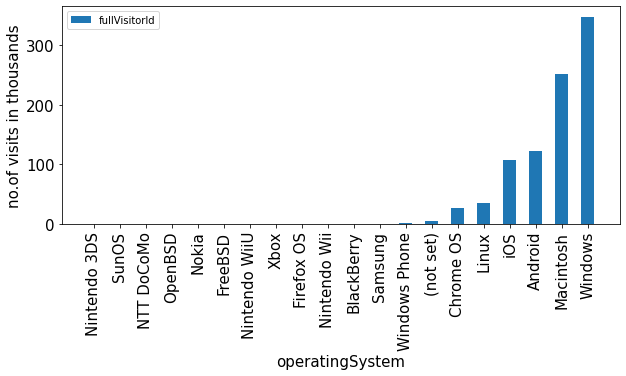

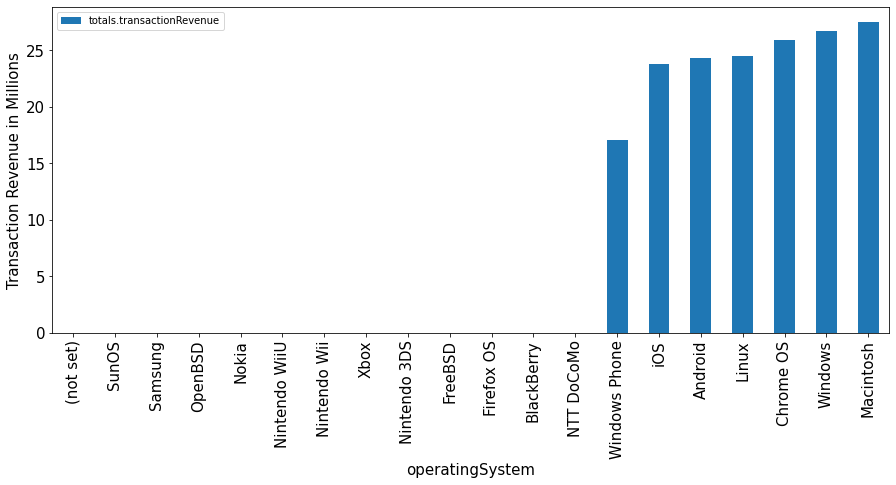

In [20]:
temp_1 = df_train.groupby('device.operatingSystem')['fullVisitorId'].count().reset_index() # counting no.of transactions in each group.

temp_2 = df_train.groupby("device.operatingSystem")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
                                                                                            # sum of all transactions


# for no.of visits in each operatingSystem plot: 
# ---------------------------------------------

temp_1['fullVisitorId'] = (temp_1['fullVisitorId'])/(10**3)
temp_1.sort_values("fullVisitorId").plot(kind='bar',x='device.operatingSystem',y='fullVisitorId',figsize=(10,4))
plt.autoscale(True)
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('operatingSystem', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in thousands', fontsize=15) # y- axis label and font size


# for revenue in each operatingSystem plot: 
# ---------------------------------------

temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)

temp_2.sort_values("totals.transactionRevenue").plot(kind='bar',x='device.operatingSystem',y='totals.transactionRevenue',figsize=(15,6))
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('operatingSystem', fontsize=15)                         # x- axis label and font size
plt.ylabel('Transaction Revenue in Millions', fontsize=15) 

- THOUGH VISITS IN MACINTOSH IS QUITE LESS THEN WINDOWS IT CONTRIBUTES MAX. IN REVENUE 
- IOS , ANDROID , LINUX HAVE LESS VISIT BUT HAVE HIGH VALUE IN GENERATION OF TRANSACTION REVENUE 
- **ANALYTICS TEAM CAN INVEST MORE ON THESE OS TO GET BETTER AD REVENUE**

***deviceCategory analysis:***
- no.of visits per each device
- total revenue generated per each device

In [21]:
df_train['device.deviceCategory'].value_counts()

desktop    660189
mobile     207503
tablet      30253
Name: device.deviceCategory, dtype: int64

Text(0, 0.5, 'Transaction Revenue in Millions')

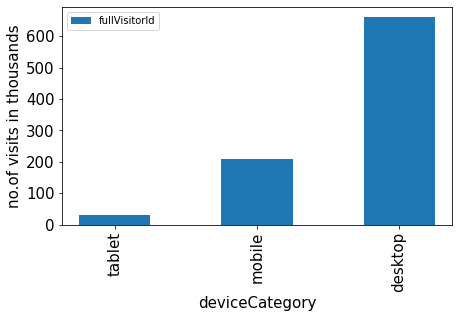

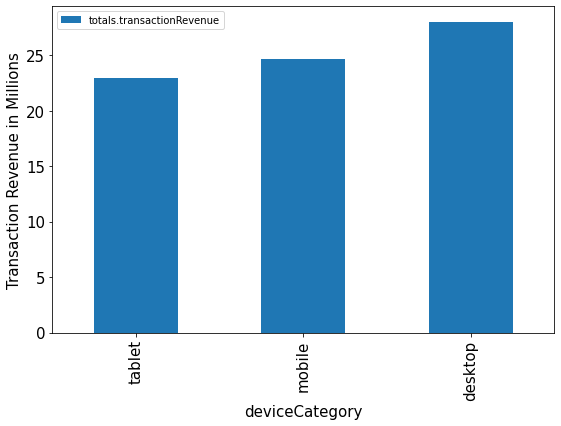

In [22]:
temp_1 = df_train.groupby('device.deviceCategory')['fullVisitorId'].count().reset_index() # counting no.of transactions in each group.

temp_2 = df_train.groupby("device.deviceCategory")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
                                                                                            # sum of all transactions


# for no.of visits in each device category plot: 
# ---------------------------------------------

temp_1['fullVisitorId'] = (temp_1['fullVisitorId'])/(10**3)
temp_1.sort_values("fullVisitorId").plot(kind='bar',x='device.deviceCategory',y='fullVisitorId',figsize=(7,4))
plt.autoscale(True)
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('deviceCategory', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in thousands', fontsize=15) # y- axis label and font size


# for revenue in each device category plot: 
# ---------------------------------------

temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)

temp_2.sort_values("totals.transactionRevenue").plot(kind='bar',x='device.deviceCategory',y='totals.transactionRevenue',figsize=(9,6))
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('deviceCategory', fontsize=15)                         # x- axis label and font size
plt.ylabel('Transaction Revenue in Millions', fontsize=15) # y- axis

- TABLET HAVE LOW VISITS BUT GOOD TRANSACTION CONTRIBUTION 
- SUGGESTES THAT EVEN IF WE CONTRIBUTE LESS IN TABLET ADS IT WILL GENERATE GOOD REVENUE

***continent analysis:***
- no.of visits per each continent
- total revenue generated wper each continent

Text(0, 0.5, 'Transaction Revenue in Millions')

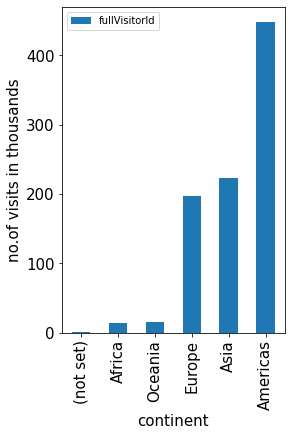

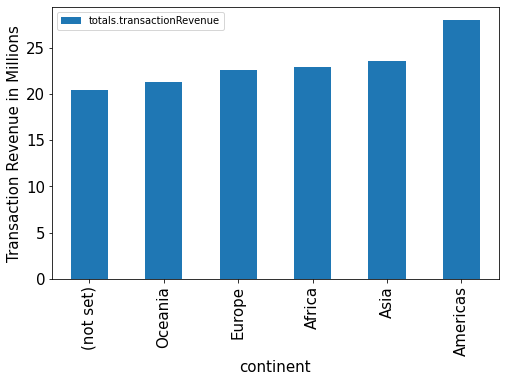

In [23]:
temp_1 = df_train.groupby('geoNetwork.continent')['fullVisitorId'].count().reset_index() # counting no.of transactions in each group.

temp_2 = df_train.groupby("geoNetwork.continent")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
                                                                                            # sum of all transactions


# for no.of visits in each continent plot: 
# ---------------------------------------------

temp_1['fullVisitorId'] = (temp_1['fullVisitorId'])/(10**3)
temp_1.sort_values("fullVisitorId").plot(kind='bar',x='geoNetwork.continent',y='fullVisitorId',figsize=(4,6))
plt.autoscale(True)
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('continent', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in thousands', fontsize=15) # y- axis label and font size


# for revenue in each continent plot: 
# ---------------------------------------

temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)

temp_2.sort_values("totals.transactionRevenue").plot(kind='bar',x='geoNetwork.continent',y='totals.transactionRevenue',figsize=(8,5))
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=15) # x- axis value's font size
plt.rc('ytick', labelsize=15) # y- axis value's font size

plt.xlabel('continent', fontsize=15)                         # x- axis label and font size
plt.ylabel('Transaction Revenue in Millions', fontsize=15) # y- axis label and font size

observation:
- no.of visits from america are significantly more compare with other continents
- even no.of visits are less from 'oceania','africa'., but this continents are also generating googd amount of revenue. so its's better to invest in this two continents sources


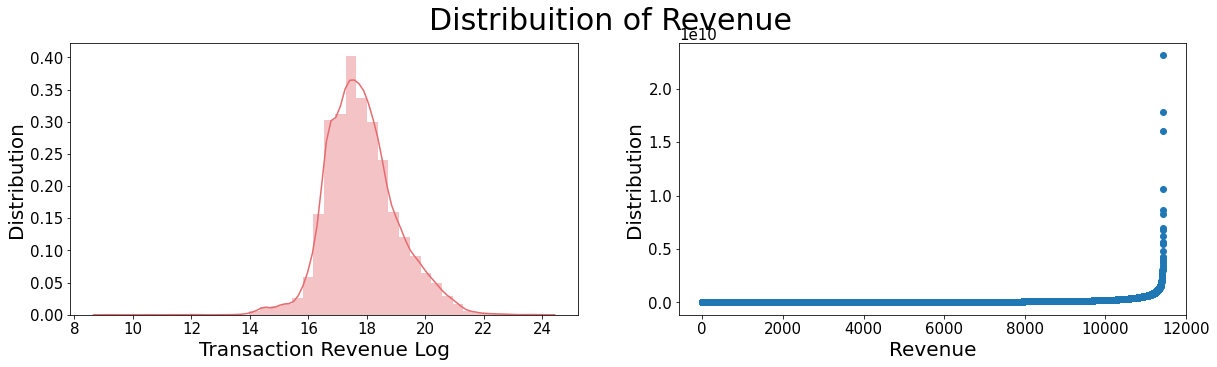

In [24]:
# Distribuition of Revenue

fig = plt.figure(figsize=(20,5))
plt.suptitle('Distribuition of Revenue', fontsize=30)

ax1 = fig.add_subplot(121)
_ = sns.distplot(np.log(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"]), bins=40,color='#e56b6f', ax=ax1)
_ = ax1.set_ylabel('Distribution', fontsize=20)
_ = ax1.set_xlabel('Transaction Revenue Log', fontsize=20)

ax2 = fig.add_subplot(122)
_ = plt.scatter(range(df_train.shape[0]),np.sort(df_train['totals.transactionRevenue'].values))
_ = ax2.set_ylabel('Distribution', fontsize=20)
_ = ax2.set_xlabel('Revenue', fontsize=20)

### Observation :

- The above graph shows that only a small percentage of customers produce most of the revenue.

In [25]:
#Revenue Based on Browsers/Devices/Operating System

def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

df_train['device.browser'].value_counts()[:10].reset_index()
    
# Device Browser
cnt_srs = df_train.groupby('device.browser')['totals.transactionRevenue'].agg(['size', 'sum', 'mean'])
cnt_srs.columns = ["count", "total revenue", "mean"]    
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), '#073b4c')
trace2 = horizontal_bar_chart(cnt_srs["total revenue"].head(10), '#073b4c')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), '#073b4c')

# Device Category
cnt_srs = df_train.groupby('device.deviceCategory')['totals.transactionRevenue'].agg(['size', 'sum', 'mean'])
cnt_srs.columns = ["count", "total revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"].head(10), '#118ab2')
trace5 = horizontal_bar_chart(cnt_srs["total revenue"].head(10), '#118ab2')
trace6 = horizontal_bar_chart(cnt_srs["mean"].head(10), '#118ab2')

# Operating system
cnt_srs = df_train.groupby('device.operatingSystem')['totals.transactionRevenue'].agg(['size', 'sum', 'mean'])
cnt_srs.columns = ["count", "total revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cnt_srs["count"].head(10), '#ef476f')
trace8 = horizontal_bar_chart(cnt_srs["total revenue"].head(10),'#ef476f')
trace9 = horizontal_bar_chart(cnt_srs["mean"].head(10),'#ef476f')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Device Browser - Count", "Device Browser - Total Revenue", "Device Browser - Mean Revenue",
                                          "Device Category - Count",  "Device Category - Total Revenue ", "Device Category - Mean Revenue", 
                                          "Device OS - Count", "Device OS - Total Revenue", "Device OS - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1200, width=1500, template='plotly_white',paper_bgcolor='#ffffff', title="Device Plots")
#plty.iplot(fig, filename='device-plots')
fig.show()

c:\python37\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Observations :

- The above graph shows that customers with desktop, operating with windows and using chrome are genrating highest revenue.

In [26]:
# browsers popularly used on Different Devices

group = df_train.groupby(['device.operatingSystem','device.browser']).size().rename('Count').reset_index()

group_sorted = group.groupby(['device.operatingSystem']).apply(lambda x: x.sort_values(['Count'], ascending=False)).reset_index(drop=True)

group_top_four = group_sorted.groupby(['device.operatingSystem']).head(4)

colors = ["#ff9f1c","#ffbf69","#cbf3f0","#2ec4b6","#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51","#e63946","#f1faee","#a8dadc","#457b9d","#1d3557"]
plty.bar(data_frame=group_top_four,x='device.operatingSystem',y='Count', color='device.browser', template='plotly_white', color_discrete_sequence= colors)

c:\python37\lib\site-packages\ipykernel_launcher.py:39: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



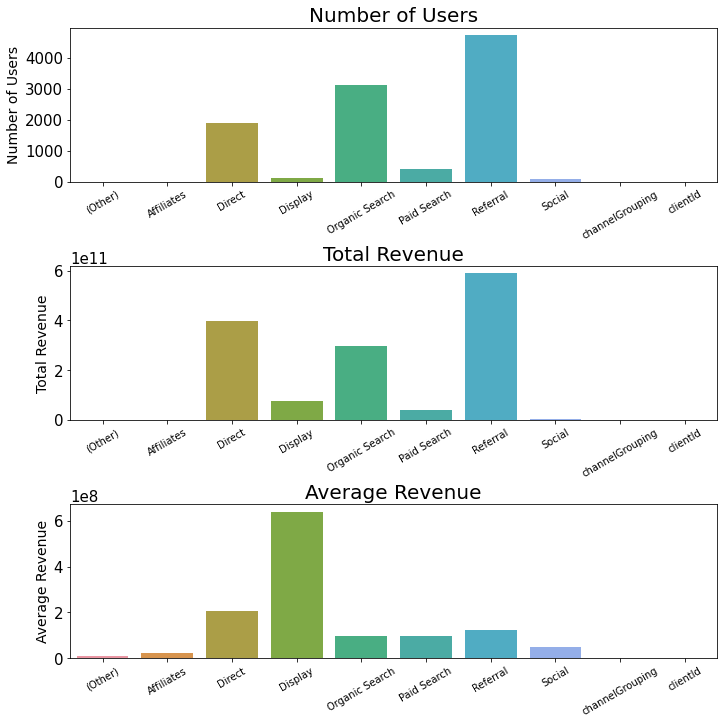

In [27]:
#Channel Groups and their Revenue

group = df_train.groupby('channelGrouping')['totals.transactionRevenue'].agg(['count','sum','mean']).reset_index()

color = ["#ffa69e","#faf3dd","#b8f2e6","#aed9e0","#5e6472",'#f6bd60','#84a59d','#f8edeb']
customPalette = sns.set_palette(sns.color_palette(color))

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
_ = sns.barplot(data=group, x='channelGrouping', y='count', palette= customPalette, ax=ax1)
xlabels = group['channelGrouping'].to_list()
ylabels = group['count']
_ = ax1.set_title('Number of Users', fontsize=20)
_ = ax1.set_ylabel('Number of Users', fontsize=14)
_ = ax1.set_xlabel('')
_ = ax1.set_xticklabels(xlabels, rotation=30, fontsize=10)

ax2 = fig.add_subplot(312)
_ = sns.barplot(data=group, x='channelGrouping', y='sum', palette= customPalette, ax=ax2)
xlabels = group['channelGrouping'].to_list()
ylabels = group['sum']
_ = ax2.set_title('Total Revenue', fontsize=20)
_ = ax2.set_ylabel('Total Revenue', fontsize=14)
_ = ax2.set_xlabel('')
_ = ax2.set_xticklabels(xlabels, rotation=30, fontsize=10)

ax3 = fig.add_subplot(313)
_ = sns.barplot(data=group, x='channelGrouping', y='mean', palette= customPalette, ax=ax3)
xlabels = group['channelGrouping'].to_list()
ylabels = group['mean']    

_ = ax3.set_title('Average Revenue', fontsize=20)
_ = ax3.set_ylabel('Average Revenue', fontsize=14)
_ = ax3.set_xlabel('')
_ = ax3.set_xticklabels(xlabels, rotation=30, fontsize=10)

fig.tight_layout(pad=0.5)
fig.show()

### Observation :

- These plots tells us that most people are doing their search via organic search whereas highest revenue is generated by referral.

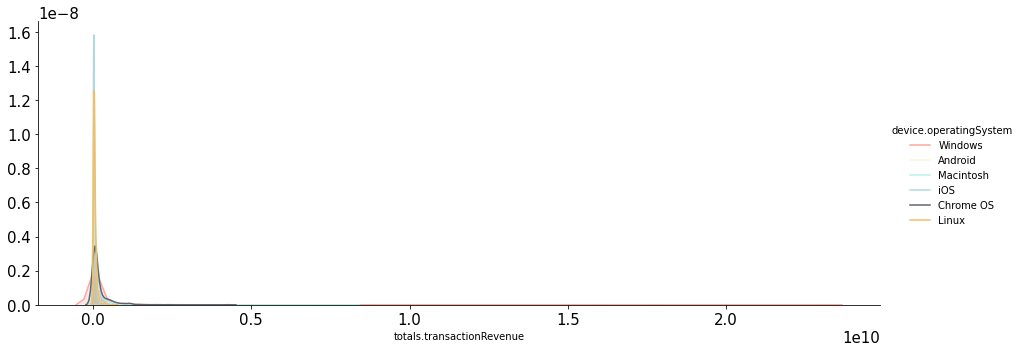

In [28]:
# Revenue by different OS

group = df_train[(df_train['device.operatingSystem'].isin\
         (df_train[df_train['totals.transactionRevenue'] > 0]['device.operatingSystem'].value_counts().reset_index()[:6]['index']))
        & (df_train['totals.transactionRevenue'] > 0)]

_ = sns.FacetGrid(group,
                      hue='device.operatingSystem', height=5, aspect=2.5)\
        .map(sns.kdeplot, 'totals.transactionRevenue', shade=True)\
                .add_legend()

### Observations :

- Windows has the highest widespread of transaction revenue whereas linux has the highest peak of transaction revenue.

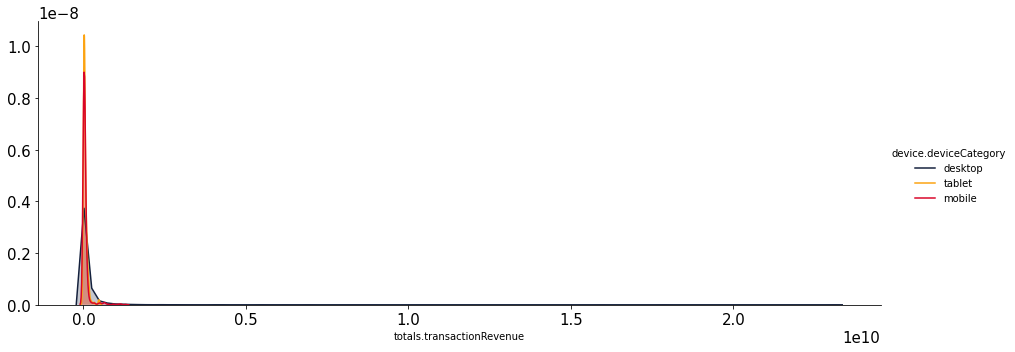

In [29]:
# Distribution of transaction Revenue of Device Category

color = ['#14213d','#fca311','#d90429']

customPalette = sns.set_palette(sns.color_palette(color))
    
_ = sns.FacetGrid(df_train[df_train['totals.transactionRevenue'] > 0],
                         hue='device.deviceCategory', height=5, aspect=2.5, palette=customPalette)\
        .map(sns.kdeplot, 'totals.transactionRevenue', shade=True)\
            .add_legend()

### Observation : 

- Desktop has the highest widespread of transaction revenue whereas Tablet has the highest peak of transaction revenue

In [30]:
# Vistis/Revenue/Sellings by Day

color_op = ['#5527A0', '#BB93D7', '#834CF7', '#6C941E', '#93EAEA', '#7425FF', '#F2098A', '#7E87AC', 
            '#EBE36F', '#7FD394', '#49C35D', '#3058EE', '#44FDCF', '#A38F85', '#C4CEE0', '#B63A05', 
            '#4856BF', '#F0DB1B', '#9FDBD9', '#B123AC']

# Visits by time train

# couting all entries by date to get number of visits by each date
dates_temp = df_train['date'].value_counts().reset_index().sort_values('index') 
# renaming the columns to apropriate names
dates_temp.columns = ['date','visits'] 

# creating the first trace with the necessary parameters
trace = go.Scatter(x=dates_temp.date.astype(str), y=dates_temp.visits,
                       opacity = 0.8, line = dict(color = '#38C788'), name= 'Visits by day')

# Below we will get the total values by Transaction Revenue Log by date
dates_temp_sum = df_train.groupby('date')['totals.transactionRevenue'].sum().reset_index()

# using the new dates_temp_sum we will create the second trace
trace1 = go.Scatter(x=dates_temp_sum.date.astype(str), line = dict(color = '#C73877'), name="RevenueLog by day",
                        y=dates_temp_sum['totals.transactionRevenue'], opacity = 0.8)

# Getting the total values by Transactions by each date
dates_temp_count = df_train[df_train['totals.transactionRevenue'] > 0].groupby('date')['totals.transactionRevenue'].count().reset_index()

# using the new dates_temp_count we will create the third trace
trace2 = go.Scatter(x=dates_temp_count.date.astype(str), line = dict(color = color_op[5]), name="Sellings by day",
                        y=dates_temp_count['totals.transactionRevenue'], opacity = 0.8)

#creating the layout the will allow us to give an title and 
# give us some interesting options to handle with the outputs of graphs
layout = dict(
    title= "Informations by Date",
    paper_bgcolor='#ffffff',
    template='plotly_white',
    xaxis=dict(rangeselector=dict(buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=3, label='3m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible = True),
        type='date'
    )
)

# creating figure with the both traces and layout
fig = dict(data= [trace, trace1, trace2], layout=layout)

#rendering the graphs
iplot(fig) #it's an equivalent to plt.show()

In [31]:
def PieChart(df_colum, title, limit=15):
    """
    This function helps to investigate the proportion of visits and total of transction revenue 
    by each category
    """

    count_trace = df_train[df_colum].value_counts()[:limit].to_frame().reset_index()
    rev_trace = df_train.groupby(df_colum)["totals.transactionRevenue"].sum().nlargest(10).to_frame().reset_index()

    trace1 = go.Pie(labels=count_trace['index'], values=count_trace[df_colum], name= "% Acesses", hole= .5, 
                    hoverinfo="label+percent+name", showlegend=True,domain= {'x': [0, .48]}, 
                    marker=dict(colors=color))

    trace2 = go.Pie(labels=rev_trace[df_colum], 
                    values=rev_trace['totals.transactionRevenue'], name="% Revenue", hole= .5, 
                    hoverinfo="label+percent+name", showlegend=False, domain= {'x': [.52, 1]})
    layout = dict(title= title, height=450, font=dict(size=15),
                  annotations = [
                      dict(
                          x=.25, y=.5,
                          text='Visits', 
                          showarrow=False,
                          font=dict(size=20)
                      ),
                      dict(
                          x=.80, y=.5,
                          text='Revenue', 
                          showarrow=False,
                          font=dict(size=20)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    iplot(fig)

In [32]:
PieChart("geoNetwork.city", "Top Cities by Accesses and Revenue", limit=10)

In [33]:
PieChart("channelGrouping", "Channel Grouping Visits and Revenues")

In [34]:
# Counting Visits Per Country
countMaps = pd.DataFrame(df_train['geoNetwork.country'].value_counts()).reset_index()
countMaps.columns=['country', 'counts'] #renaming columns
countMaps = countMaps.reset_index().drop('index', axis=1) #reseting index and droping the column

data = [ dict(
        type = 'choropleth',
        locations = countMaps['country'],
        locationmode = 'country names',
        z = countMaps['counts'],
        text = countMaps['country'],
        colorscale = 'YlGnBu',
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Visits'),
      ) ]
layout = dict(
    title = 'Couting Visits Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

figure = dict( data=data, layout=layout )
iplot(figure, validate=False, filename='map-countrys-count')

In [35]:
countMaps = df_train.groupby('geoNetwork.country')['totals.transactionRevenue'].sum().reset_index()
countMaps.columns=['country', 'revenue'] #renaming columns
countMaps = countMaps.reset_index().drop('index', axis=1) #reseting index and droping the column

data = [ dict(
        type = 'choropleth',
        locations = countMaps['country'],
        locationmode = 'country names',
        z = countMaps['revenue'],
        text = countMaps['country'],
        colorscale = 'Jet',
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Revenue'),
      ) ]

layout = dict(
    title = 'Total Revenue Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

figure = dict( data=data, layout=layout )
iplot(figure, validate=False, filename='map-countrys-count')